# 1. Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [3]:
from datetime import datetime, timedelta

In [4]:
import yfinance as yf

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
start = datetime(2018,1,1)
end = datetime(2023, 11, 23)

In [7]:
google = yf.Ticker('GOOG')
msft=yf.Ticker('MSFT')
appl=yf.Ticker('AAPL')
amzn=yf.Ticker('AMZN')

In [8]:
google_df = google.history(start=start, end=end)
msft_df = msft.history(start=start, end=end)
appl_df=appl.history(start=start, end=end)
amzn_df=amzn.history(start=start, end=end)

In [9]:
google_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-01-02 00:00:00-05:00,52.417000,53.347000,52.261501,53.250000,24752000,0.0,0.0
2018-01-03 00:00:00-05:00,53.215500,54.314499,53.160500,54.124001,28604000,0.0,0.0
2018-01-04 00:00:00-05:00,54.400002,54.678501,54.200100,54.320000,20092000,0.0,0.0
2018-01-05 00:00:00-05:00,54.700001,55.212502,54.599998,55.111500,25582000,0.0,0.0
2018-01-08 00:00:00-05:00,55.111500,55.563499,55.081001,55.347000,20952000,0.0,0.0


In [10]:
msft_df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-11-16 00:00:00-05:00,370.959991,376.350006,370.179993,376.170013,27182300,0.0,0.0
2023-11-17 00:00:00-05:00,373.609985,374.369995,367.000000,369.850006,40157000,0.0,0.0
2023-11-20 00:00:00-05:00,371.220001,378.869995,371.000000,377.440002,52465100,0.0,0.0
2023-11-21 00:00:00-05:00,375.670013,376.220001,371.119995,373.070007,28423100,0.0,0.0
2023-11-22 00:00:00-05:00,378.000000,379.790009,374.970001,377.850006,23345300,0.0,0.0


In [30]:
# 这个最好放到ppt上

df_all.describe()

,Google,Microsoft,Apple,Amazon
count,1483.000000,1483.000000,1483.000000,1483.000000
mean,0.084701,0.122784,0.124567,0.086052
std,1.973396,1.910231,2.009380,2.242313
min,-11.100818,-14.739026,-12.864692,-14.049438
25%,-0.868650,-0.810038,-0.837621,-1.060933
50%,0.116582,0.131216,0.125477,0.123403
75%,1.104347,1.114297,1.198901,1.228387
max,10.448541,14.216890,11.980844,13.535902


# 2. Pre-processing

In [12]:
# 选择闭市价
g_returns = 100 * google_df[['Close']].pct_change().dropna() 
ms_returns = 100 * msft_df[['Close']].pct_change().dropna() 
appl_returns=100 * appl_df[['Close']].pct_change().dropna() 
amzn_returns=100 * amzn_df[['Close']].pct_change().dropna() 

### Decomposition

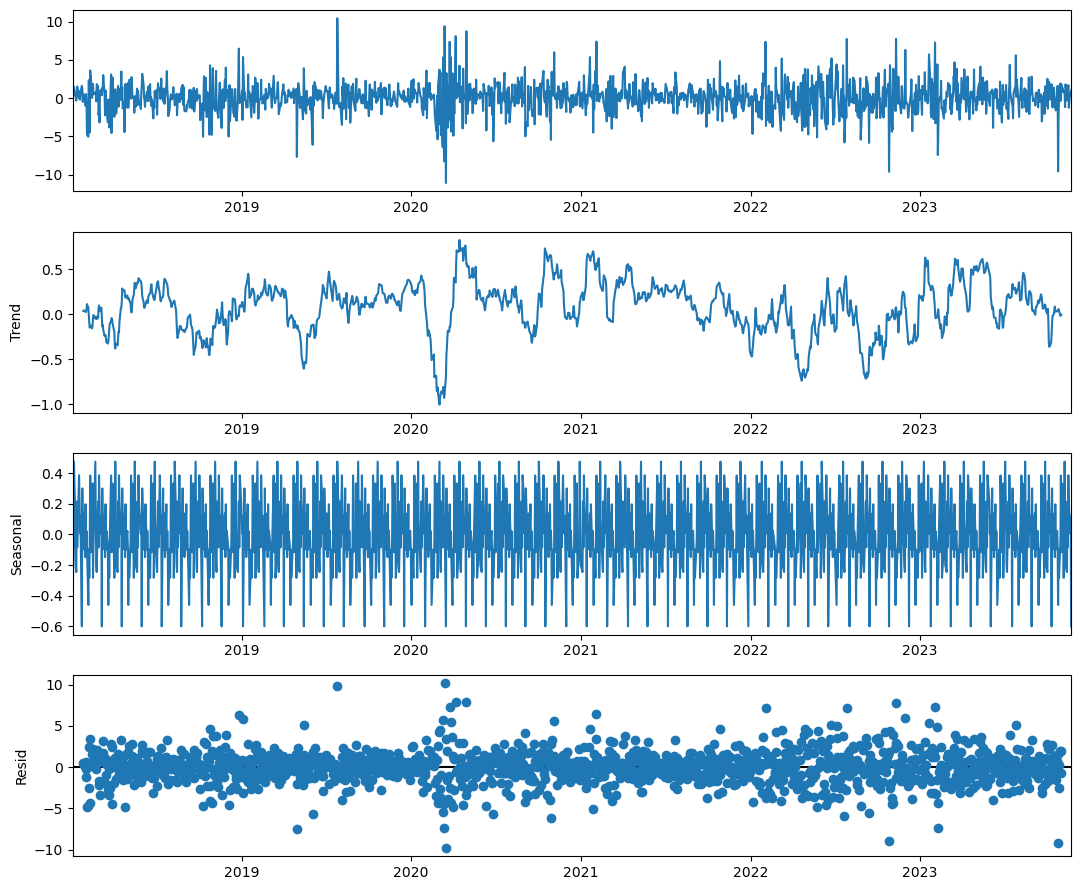

In [13]:
from pylab import rcParams

# Google

rcParams['figure.figsize'] = 11, 9
decomposed = sm.tsa.seasonal_decompose(g_returns,period=30) # Check whether there exists monthly seasonality
figure = decomposed.plot() 
plt.show()

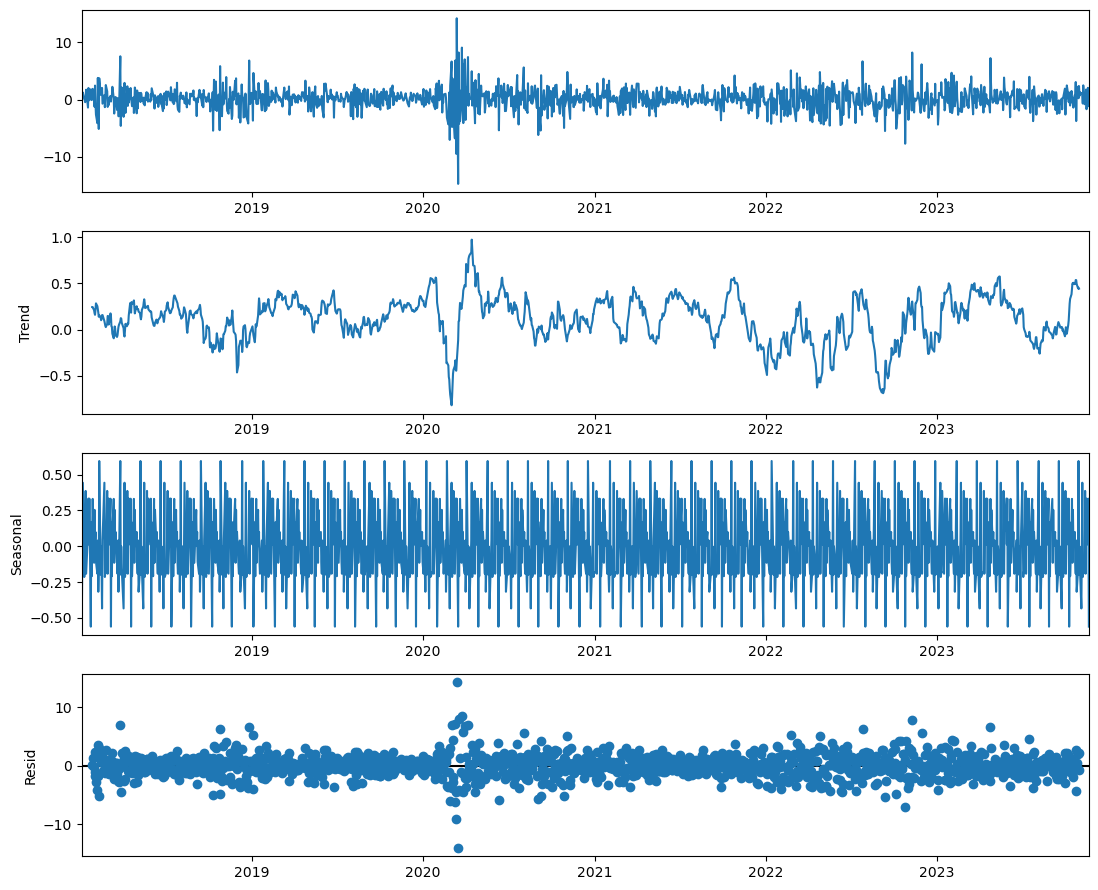

In [14]:
# Microsoft
rcParams['figure.figsize'] = 11, 9
decomposed = sm.tsa.seasonal_decompose(ms_returns,period=30) # Check whether there exists monthly seasonality
figure = decomposed.plot() 
plt.show()

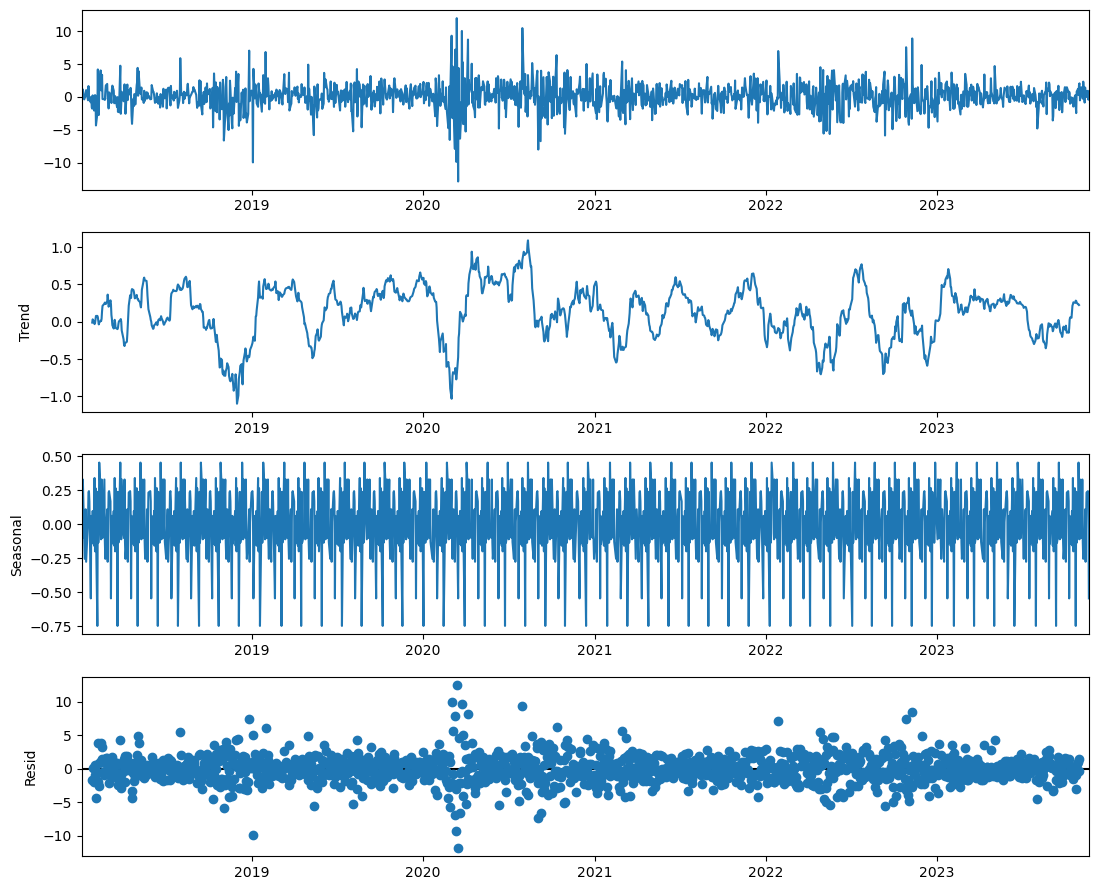

In [15]:
# Apple

rcParams['figure.figsize'] = 11, 9
decomposed = sm.tsa.seasonal_decompose(appl_returns,period=30) # Check whether there exists monthly seasonality
figure = decomposed.plot() 
plt.show()

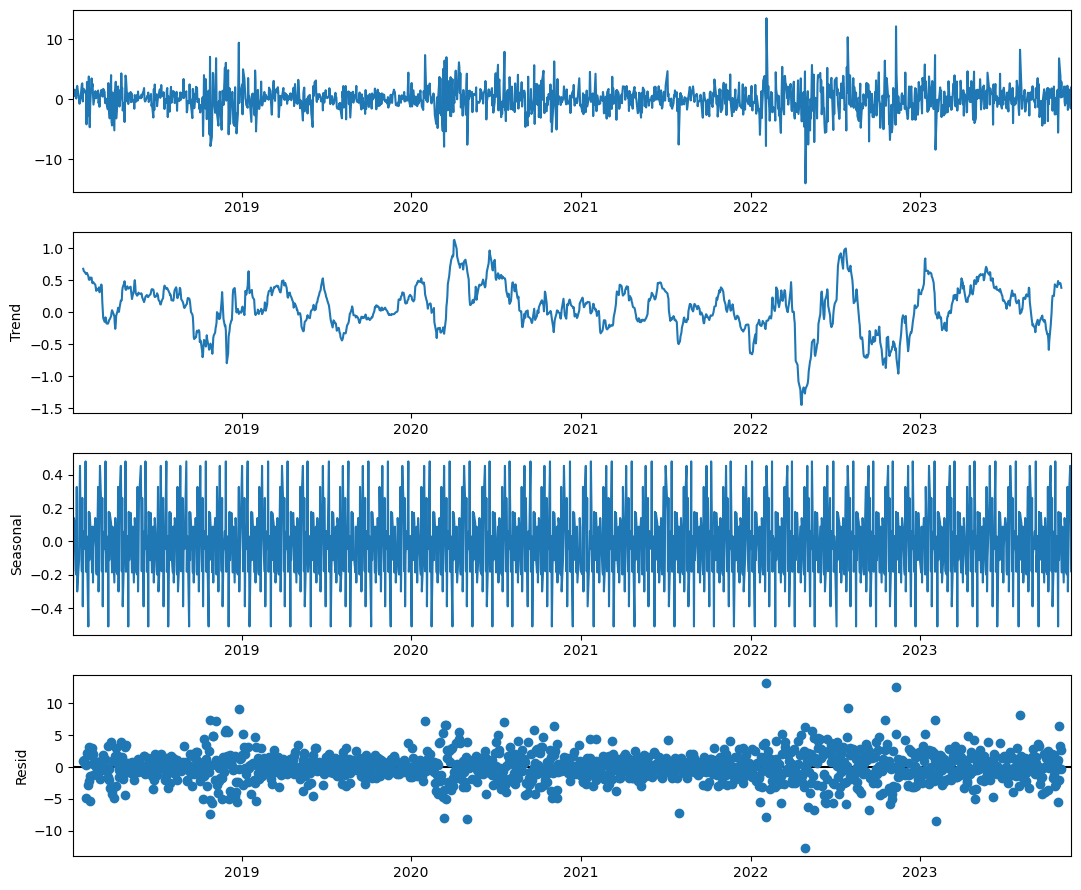

In [16]:
#Amazon

rcParams['figure.figsize'] = 11, 9
decomposed = sm.tsa.seasonal_decompose(amzn_returns,period=30) # Check whether there exists monthly seasonality
figure = decomposed.plot() 
plt.show()

### Correlations

In [17]:
df_all = pd.concat([g_returns, ms_returns, appl_returns, amzn_returns], axis=1)

df_all.columns = ['Google', 'Microsoft', 'Apple', 'Amazon']

df_all.head()

,Google,Microsoft,Apple,Amazon
Date,,,,
2018-01-03 00:00:00-05:00,1.641316,0.465396,-0.017414,1.277531
2018-01-04 00:00:00-05:00,0.362130,0.880118,0.464491,0.447601
2018-01-05 00:00:00-05:00,1.457106,1.239845,1.138537,1.616252
2018-01-08 00:00:00-05:00,0.427316,0.102031,-0.371423,1.442468
2018-01-09 00:00:00-05:00,-0.061431,-0.067976,-0.011495,0.467571


Text(0.5, 1.0, 'Correlation of stock closing return')

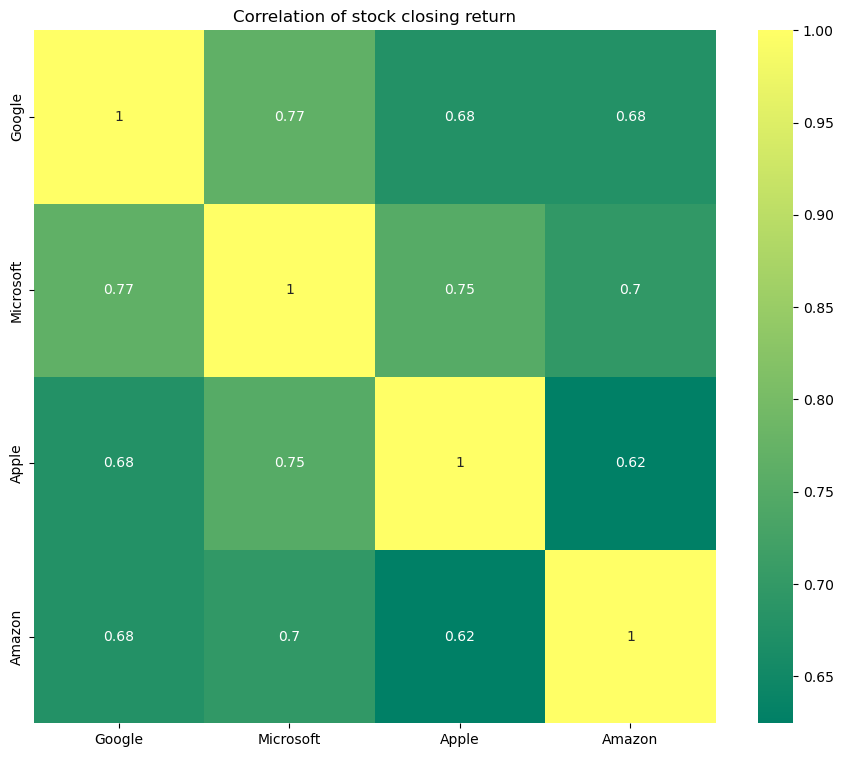

In [19]:
import seaborn as sns

plt.figure()
sns.heatmap(df_all.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing return')

## Stationarity Check

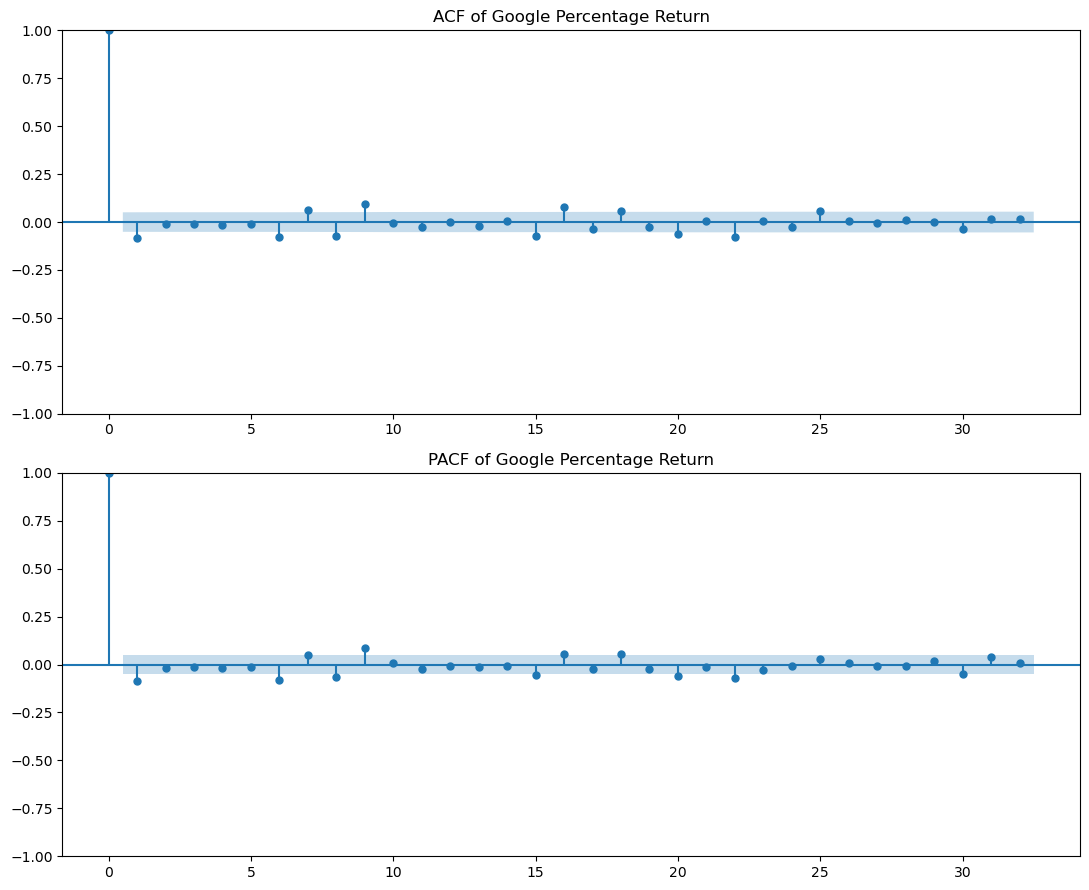

In [20]:
fig, axs = plt.subplots(2)

plot_acf(g_returns, ax=axs[0])
axs[0].set_title('ACF of Google Percentage Return')
plot_pacf(g_returns, ax=axs[1])
axs[1].set_title('PACF of Google Percentage Return')

plt.tight_layout()
plt.show()

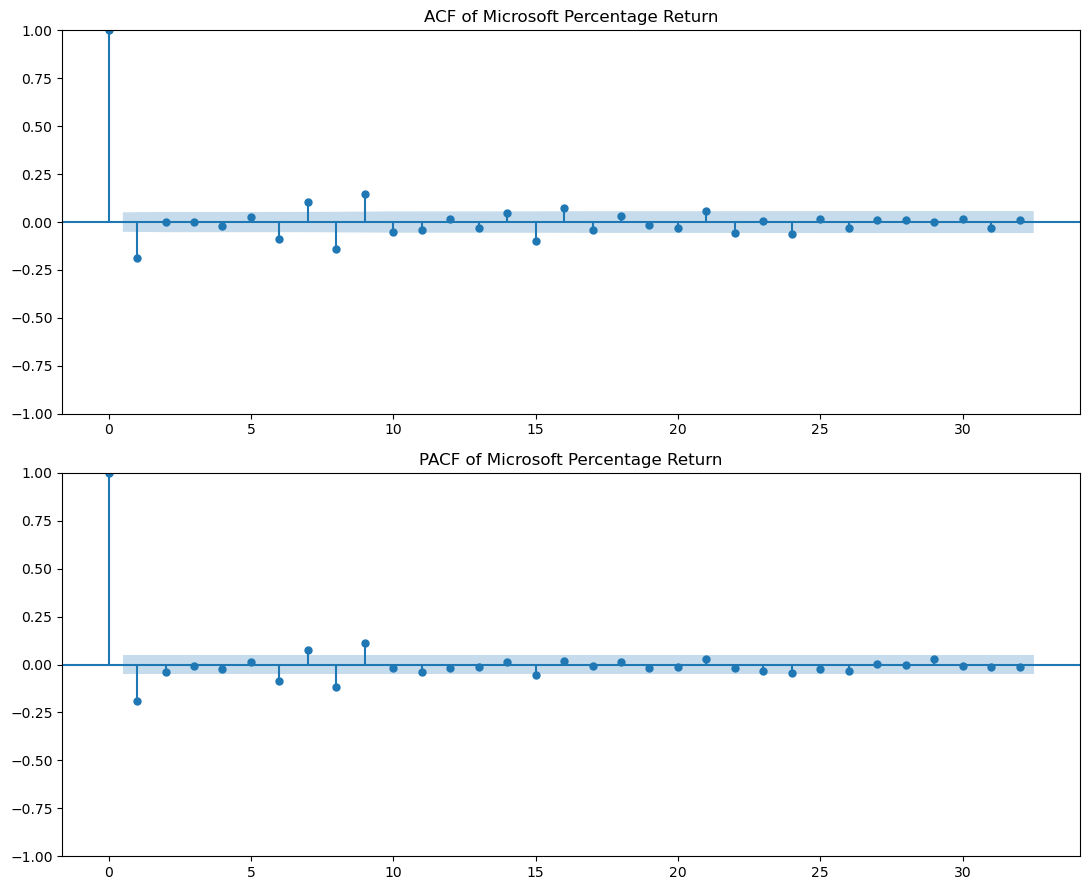

In [21]:
fig, axs = plt.subplots(2)

plot_acf(ms_returns, ax=axs[0])
axs[0].set_title('ACF of Microsoft Percentage Return')
plot_pacf(ms_returns, ax=axs[1])
axs[1].set_title('PACF of Microsoft Percentage Return')

plt.tight_layout()
plt.show()

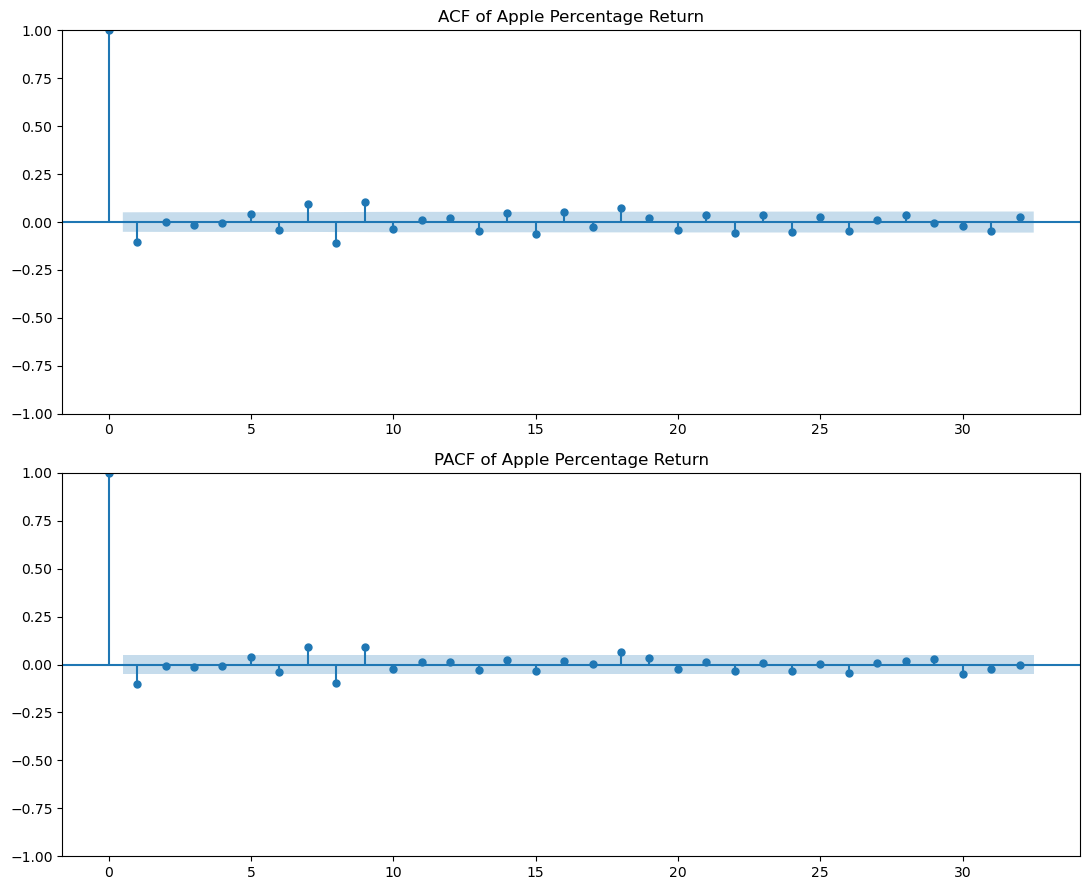

In [22]:
fig, axs = plt.subplots(2)

plot_acf(appl_returns, ax=axs[0])
axs[0].set_title('ACF of Apple Percentage Return')
plot_pacf(appl_returns, ax=axs[1])
axs[1].set_title('PACF of Apple Percentage Return')

plt.tight_layout()
plt.show()

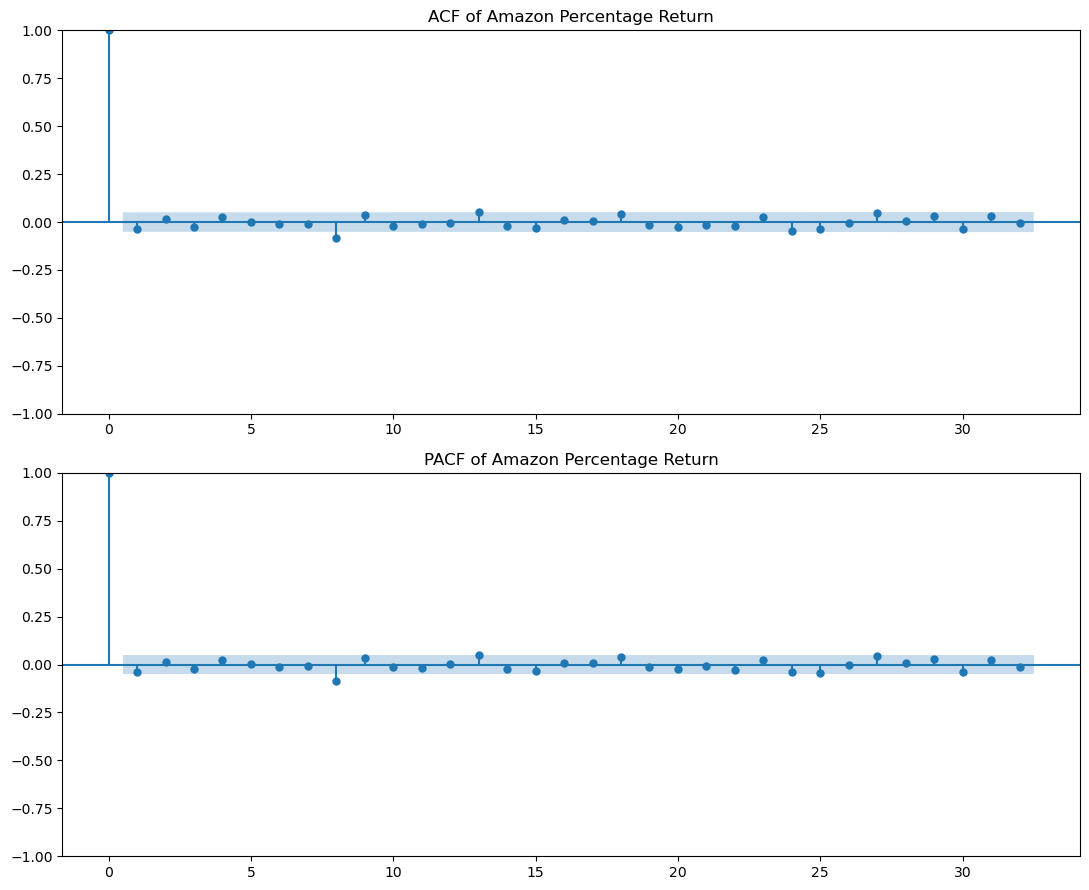

In [23]:
fig, axs = plt.subplots(2)

plot_acf(amzn_returns, ax=axs[0])
axs[0].set_title('ACF of Amazon Percentage Return')
plot_pacf(amzn_returns, ax=axs[1])
axs[1].set_title('PACF of Amazon Percentage Return')

plt.tight_layout()
plt.show()

### The Augmented Dickey-Fuller test

In [24]:
from statsmodels.tsa.stattools import adfuller

goo_adftest = adfuller(g_returns)
goo_adf_results= pd.Series(goo_adftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in goo_adftest[4].items():
    goo_adf_results['Critical Value (%s)'%key] = value
goo_adf_results

Test Statistic                -9.414402e+00
p-value                        5.720638e-16
#Lags Used                     2.100000e+01
Number of Observations Used    1.461000e+03
Critical Value (1%)           -3.434834e+00
Critical Value (5%)           -2.863520e+00
Critical Value (10%)          -2.567824e+00
dtype: float64

In [25]:
# As the p-value is less than 0.05, so reject the null hypothesis. Thus, the data is stationary.

In [26]:
msft_adftest = adfuller(ms_returns)
msft_adf_results= pd.Series(msft_adftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in msft_adftest[4].items():
    msft_adf_results['Critical Value (%s)'%key] = value
msft_adf_results

Test Statistic                -1.291611e+01
p-value                        3.962919e-24
#Lags Used                     8.000000e+00
Number of Observations Used    1.474000e+03
Critical Value (1%)           -3.434794e+00
Critical Value (5%)           -2.863503e+00
Critical Value (10%)          -2.567815e+00
dtype: float64

In [27]:
# As the p-value is less than 0.05, so reject the null hypothesis. Thus, the data is stationary.

In [28]:
appl_adftest = adfuller(appl_returns)
appl_adf_results= pd.Series(appl_adftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in appl_adftest[4].items():
    appl_adf_results['Critical Value (%s)'%key] = value
appl_adf_results

Test Statistic                -1.212182e+01
p-value                        1.817900e-22
#Lags Used                     8.000000e+00
Number of Observations Used    1.474000e+03
Critical Value (1%)           -3.434794e+00
Critical Value (5%)           -2.863503e+00
Critical Value (10%)          -2.567815e+00
dtype: float64

In [29]:
amzn_adftest = adfuller(amzn_returns)
amzn_adf_results= pd.Series(amzn_adftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in amzn_adftest[4].items():
    amzn_adf_results['Critical Value (%s)'%key] = value
amzn_adf_results

Test Statistic                  -39.904763
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    1482.000000
Critical Value (1%)              -3.434770
Critical Value (5%)              -2.863492
Critical Value (10%)             -2.567809
dtype: float64

In [31]:
# Reject all H0, unit root doesn't exists. All stationary(trend-stationary).

# 3. Fit VAR model

In [32]:
# Train (90%) & Test (10%) Split

nobs = round(0.1*len(df_all))
train, test = df_all[0:-nobs], df_all[-nobs:]

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1335 entries, 2018-01-03 00:00:00-05:00 to 2023-04-24 00:00:00-04:00
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Google     1335 non-null   float64
 1   Microsoft  1335 non-null   float64
 2   Apple      1335 non-null   float64
 3   Amazon     1335 non-null   float64
dtypes: float64(4)
memory usage: 52.1 KB


In [34]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 148 entries, 2023-04-25 00:00:00-04:00 to 2023-11-22 00:00:00-05:00
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Google     148 non-null    float64
 1   Microsoft  148 non-null    float64
 2   Apple      148 non-null    float64
 3   Amazon     148 non-null    float64
dtypes: float64(4)
memory usage: 5.8 KB


In [35]:
model = VAR(df_all)
aic=[]
for i in range(30):
    result = model.fit(i)
    aic.append(result.aic)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')
    


Lag Order = 0
AIC :  3.104278017702405
BIC :  3.118578280257059
FPE :  22.293117945364813
HQIC:  3.109608423382296 

Lag Order = 1
AIC :  3.067713431367849
BIC :  3.1392538875872287
FPE :  21.492704109011978
HQIC:  3.0943809501120687 

Lag Order = 2
AIC :  3.0836107843884357
BIC :  3.212454147868274
FPE :  21.83712237602412
HQIC:  3.1316402349554164 

Lag Order = 3
AIC :  3.085576703625577
BIC :  3.2717858002954583
FPE :  21.880121070828544
HQIC:  3.1549929504757377 

Lag Order = 4
AIC :  3.0954127591090694
BIC :  3.339050527509566
FPE :  22.0964466166527
HQIC:  3.1862407125194725 

Lag Order = 5
AIC :  3.1051270049082578
BIC :  3.406256496468937
FPE :  22.312223221207866
HQIC:  3.217391621087627 

Lag Order = 6
AIC :  3.1052020969360523
BIC :  3.463886476254358
FPE :  22.314016656064346
HQIC:  3.238928378140161 

Lag Order = 7
AIC :  3.095227650495675
BIC :  3.5115301956166833
FPE :  22.09271422043248
HQIC:  3.2504406451430965 

Lag Order = 8
AIC :  3.09644844892944
BIC :  3.570432551

In [36]:
aic.sort()
aic

[3.067713431367849,
 3.0836107843884357,
 3.085576703625577,
 3.095227650495675,
 3.0954127591090694,
 3.0962829282706856,
 3.09644844892944,
 3.104278017702405,
 3.1051270049082578,
 3.1052020969360523,
 3.1109272560625527,
 3.1256770544946137,
 3.1399583162905658,
 3.145291872052599,
 3.149367398154286,
 3.1655862730147497,
 3.173249402188254,
 3.1913388359235966,
 3.1948162795527826,
 3.2012293749351795,
 3.202696767041969,
 3.206244259975531,
 3.2093099513619596,
 3.2134783101404683,
 3.22372021800385,
 3.2256931219829585,
 3.229452151810924,
 3.2364024290956888,
 3.243249527105825,
 3.2622999754944804]

In [37]:
# lag=1时有最小的AIC

In [38]:
# According to AIC check, the explicitly computed AIC is the lowest at lag 1.

model = VAR(train)
model_fitted = model.fit(1)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 27, Nov, 2023
Time:                     22:32:47
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    3.10446
Nobs:                     1334.00    HQIC:                   3.05575
Log likelihood:          -9570.17    FPE:                    20.6261
AIC:                      3.02656    Det(Omega_mle):         20.3197
--------------------------------------------------------------------
Results for equation Google
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const                0.091538         0.054267            1.687           0.092
L1.Google            0.023087         0.047223            0.489           0.625
L1.Microsoft        -0.132882         0.054799           -2.425

## Granger Casuality Check

In [39]:
# As the data is stationary, so we can now conduct Granger Casuality Check

In [40]:
from statsmodels.tsa.stattools import grangercausalitytests

In [41]:
for i in range(len(df_all.columns)):
    for j in range(len(df_all.columns)):
        if i != j:
            print(f"\nGranger Causality test for {df_all.columns[j]} caused by {df_all.columns[i]}:")
            grangercausalitytests(df_all[[df_all.columns[j], df_all.columns[i]]], maxlag=30)



Granger Causality test for Microsoft caused by Google:

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0148  , p=0.9031  , df_denom=1479, df_num=1
ssr based chi2 test:   chi2=0.0149  , p=0.9030  , df=1
likelihood ratio test: chi2=0.0149  , p=0.9030  , df=1
parameter F test:         F=0.0148  , p=0.9031  , df_denom=1479, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0073  , p=0.9927  , df_denom=1476, df_num=2
ssr based chi2 test:   chi2=0.0146  , p=0.9927  , df=2
likelihood ratio test: chi2=0.0146  , p=0.9927  , df=2
parameter F test:         F=0.0073  , p=0.9927  , df_denom=1476, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.3462  , p=0.0185  , df_denom=1473, df_num=3
ssr based chi2 test:   chi2=10.0864 , p=0.0178  , df=3
likelihood ratio test: chi2=10.0522 , p=0.0181  , df=3
parameter F test:         F=3.3462  , p=0.0185  , df_denom=1473, df_num=3

Granger Causality
number of lag

ssr based F test:         F=3.6017  , p=0.0004  , df_denom=1458, df_num=8
ssr based chi2 test:   chi2=29.1498 , p=0.0003  , df=8
likelihood ratio test: chi2=28.8655 , p=0.0003  , df=8
parameter F test:         F=3.6017  , p=0.0004  , df_denom=1458, df_num=8

Granger Causality
number of lags (no zero) 9
ssr based F test:         F=3.2036  , p=0.0008  , df_denom=1455, df_num=9
ssr based chi2 test:   chi2=29.2090 , p=0.0006  , df=9
likelihood ratio test: chi2=28.9233 , p=0.0007  , df=9
parameter F test:         F=3.2036  , p=0.0008  , df_denom=1455, df_num=9

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=2.9256  , p=0.0012  , df_denom=1452, df_num=10
ssr based chi2 test:   chi2=29.6791 , p=0.0010  , df=10
likelihood ratio test: chi2=29.3841 , p=0.0011  , df=10
parameter F test:         F=2.9256  , p=0.0012  , df_denom=1452, df_num=10

Granger Causality
number of lags (no zero) 11
ssr based F test:         F=2.6893  , p=0.0020  , df_denom=1449, df_num=11
ssr bas

ssr based F test:         F=2.3346  , p=0.0035  , df_denom=1440, df_num=14
ssr based chi2 test:   chi2=33.3422 , p=0.0026  , df=14
likelihood ratio test: chi2=32.9695 , p=0.0029  , df=14
parameter F test:         F=2.3346  , p=0.0035  , df_denom=1440, df_num=14

Granger Causality
number of lags (no zero) 15
ssr based F test:         F=2.4598  , p=0.0014  , df_denom=1437, df_num=15
ssr based chi2 test:   chi2=37.6930 , p=0.0010  , df=15
likelihood ratio test: chi2=37.2172 , p=0.0012  , df=15
parameter F test:         F=2.4598  , p=0.0014  , df_denom=1437, df_num=15

Granger Causality
number of lags (no zero) 16
ssr based F test:         F=2.5256  , p=0.0008  , df_denom=1434, df_num=16
ssr based chi2 test:   chi2=41.3389 , p=0.0005  , df=16
likelihood ratio test: chi2=40.7671 , p=0.0006  , df=16
parameter F test:         F=2.5256  , p=0.0008  , df_denom=1434, df_num=16

Granger Causality
number of lags (no zero) 17
ssr based F test:         F=2.4307  , p=0.0009  , df_denom=1431, df_num=1

ssr based F test:         F=2.4876  , p=0.0005  , df_denom=1428, df_num=18
ssr based chi2 test:   chi2=45.9369 , p=0.0003  , df=18
likelihood ratio test: chi2=45.2314 , p=0.0004  , df=18
parameter F test:         F=2.4876  , p=0.0005  , df_denom=1428, df_num=18

Granger Causality
number of lags (no zero) 19
ssr based F test:         F=2.4895  , p=0.0004  , df_denom=1425, df_num=19
ssr based chi2 test:   chi2=48.5951 , p=0.0002  , df=19
likelihood ratio test: chi2=47.8060 , p=0.0003  , df=19
parameter F test:         F=2.4895  , p=0.0004  , df_denom=1425, df_num=19

Granger Causality
number of lags (no zero) 20
ssr based F test:         F=2.3382  , p=0.0007  , df_denom=1422, df_num=20
ssr based chi2 test:   chi2=48.1116 , p=0.0004  , df=20
likelihood ratio test: chi2=47.3374 , p=0.0005  , df=20
parameter F test:         F=2.3382  , p=0.0007  , df_denom=1422, df_num=20

Granger Causality
number of lags (no zero) 21
ssr based F test:         F=2.3577  , p=0.0005  , df_denom=1419, df_num=2

ssr based F test:         F=1.8605  , p=0.0070  , df_denom=1410, df_num=24
ssr based chi2 test:   chi2=46.2044 , p=0.0042  , df=24
likelihood ratio test: chi2=45.4879 , p=0.0051  , df=24
parameter F test:         F=1.8605  , p=0.0070  , df_denom=1410, df_num=24

Granger Causality
number of lags (no zero) 25
ssr based F test:         F=1.7902  , p=0.0097  , df_denom=1407, df_num=25
ssr based chi2 test:   chi2=46.3764 , p=0.0058  , df=25
likelihood ratio test: chi2=45.6541 , p=0.0070  , df=25
parameter F test:         F=1.7902  , p=0.0097  , df_denom=1407, df_num=25

Granger Causality
number of lags (no zero) 26
ssr based F test:         F=1.7072  , p=0.0149  , df_denom=1404, df_num=26
ssr based chi2 test:   chi2=46.0620 , p=0.0090  , df=26
likelihood ratio test: chi2=45.3489 , p=0.0108  , df=26
parameter F test:         F=1.7072  , p=0.0149  , df_denom=1404, df_num=26

Granger Causality
number of lags (no zero) 27
ssr based F test:         F=1.6355  , p=0.0214  , df_denom=1401, df_num=2

likelihood ratio test: chi2=13.1195 , p=0.0003  , df=1
parameter F test:         F=13.1511 , p=0.0003  , df_denom=1479, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=6.7954  , p=0.0012  , df_denom=1476, df_num=2
ssr based chi2 test:   chi2=13.6368 , p=0.0011  , df=2
likelihood ratio test: chi2=13.5744 , p=0.0011  , df=2
parameter F test:         F=6.7954  , p=0.0012  , df_denom=1476, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.5236  , p=0.0036  , df_denom=1473, df_num=3
ssr based chi2 test:   chi2=13.6352 , p=0.0034  , df=3
likelihood ratio test: chi2=13.5727 , p=0.0035  , df=3
parameter F test:         F=4.5236  , p=0.0036  , df_denom=1473, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.4855  , p=0.0077  , df_denom=1470, df_num=4
ssr based chi2 test:   chi2=14.0272 , p=0.0072  , df=4
likelihood ratio test: chi2=13.9611 , p=0.0074  , df=4
parameter F test:         F=3.485

ssr based F test:         F=1.3485  , p=0.1485  , df_denom=1428, df_num=18
ssr based chi2 test:   chi2=24.9021 , p=0.1276  , df=18
likelihood ratio test: chi2=24.6928 , p=0.1336  , df=18
parameter F test:         F=1.3485  , p=0.1485  , df_denom=1428, df_num=18

Granger Causality
number of lags (no zero) 19
ssr based F test:         F=1.4544  , p=0.0929  , df_denom=1425, df_num=19
ssr based chi2 test:   chi2=28.3902 , p=0.0762  , df=19
likelihood ratio test: chi2=28.1185 , p=0.0812  , df=19
parameter F test:         F=1.4544  , p=0.0929  , df_denom=1425, df_num=19

Granger Causality
number of lags (no zero) 20
ssr based F test:         F=1.4273  , p=0.0993  , df_denom=1422, df_num=20
ssr based chi2 test:   chi2=29.3694 , p=0.0807  , df=20
likelihood ratio test: chi2=29.0785 , p=0.0862  , df=20
parameter F test:         F=1.4273  , p=0.0993  , df_denom=1422, df_num=20

Granger Causality
number of lags (no zero) 21
ssr based F test:         F=1.4603  , p=0.0816  , df_denom=1419, df_num=2

likelihood ratio test: chi2=35.7988 , p=0.0049  , df=17
parameter F test:         F=2.0808  , p=0.0060  , df_denom=1431, df_num=17

Granger Causality
number of lags (no zero) 18
ssr based F test:         F=2.0655  , p=0.0054  , df_denom=1428, df_num=18
ssr based chi2 test:   chi2=38.1424 , p=0.0037  , df=18
likelihood ratio test: chi2=37.6544 , p=0.0043  , df=18
parameter F test:         F=2.0655  , p=0.0054  , df_denom=1428, df_num=18

Granger Causality
number of lags (no zero) 19
ssr based F test:         F=1.9917  , p=0.0067  , df_denom=1425, df_num=19
ssr based chi2 test:   chi2=38.8773 , p=0.0046  , df=19
likelihood ratio test: chi2=38.3701 , p=0.0053  , df=19
parameter F test:         F=1.9917  , p=0.0067  , df_denom=1425, df_num=19

Granger Causality
number of lags (no zero) 20
ssr based F test:         F=1.8452  , p=0.0128  , df_denom=1422, df_num=20
ssr based chi2 test:   chi2=37.9688 , p=0.0089  , df=20
likelihood ratio test: chi2=37.4845 , p=0.0102  , df=20
parameter F test:

likelihood ratio test: chi2=27.3335 , p=0.1261  , df=20
parameter F test:         F=1.3409  , p=0.1429  , df_denom=1422, df_num=20

Granger Causality
number of lags (no zero) 21
ssr based F test:         F=1.2844  , p=0.1743  , df_denom=1419, df_num=21
ssr based chi2 test:   chi2=27.7893 , p=0.1462  , df=21
likelihood ratio test: chi2=27.5285 , p=0.1540  , df=21
parameter F test:         F=1.2844  , p=0.1743  , df_denom=1419, df_num=21

Granger Causality
number of lags (no zero) 22
ssr based F test:         F=1.3280  , p=0.1414  , df_denom=1416, df_num=22
ssr based chi2 test:   chi2=30.1452 , p=0.1150  , df=22
likelihood ratio test: chi2=29.8384 , p=0.1224  , df=22
parameter F test:         F=1.3280  , p=0.1414  , df_denom=1416, df_num=22

Granger Causality
number of lags (no zero) 23
ssr based F test:         F=1.2985  , p=0.1560  , df_denom=1413, df_num=23
ssr based chi2 test:   chi2=30.8580 , p=0.1263  , df=23
likelihood ratio test: chi2=30.5365 , p=0.1346  , df=23
parameter F test:

ssr based F test:         F=1.1279  , p=0.3416  , df_denom=1470, df_num=4
ssr based chi2 test:   chi2=4.5392  , p=0.3379  , df=4
likelihood ratio test: chi2=4.5322  , p=0.3387  , df=4
parameter F test:         F=1.1279  , p=0.3416  , df_denom=1470, df_num=4

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=0.9718  , p=0.4337  , df_denom=1467, df_num=5
ssr based chi2 test:   chi2=4.8954  , p=0.4288  , df=5
likelihood ratio test: chi2=4.8873  , p=0.4298  , df=5
parameter F test:         F=0.9718  , p=0.4337  , df_denom=1467, df_num=5

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=0.8073  , p=0.5642  , df_denom=1464, df_num=6
ssr based chi2 test:   chi2=4.8869  , p=0.5584  , df=6
likelihood ratio test: chi2=4.8789  , p=0.5594  , df=6
parameter F test:         F=0.8073  , p=0.5642  , df_denom=1464, df_num=6

Granger Causality
number of lags (no zero) 7
ssr based F test:         F=0.7971  , p=0.5897  , df_denom=1461, df_num=7
ssr based chi2

In [42]:
results_df = pd.DataFrame(columns=df_all.columns, index=df_all.columns)

for i in range(len(df_all.columns)):
    for j in range(len(df_all.columns)):
        if i != j:
            
            test_result=grangercausalitytests(df_all[[df_all.columns[j], df_all.columns[i]]], maxlag=30, verbose=False)
            
            # Get the p-value of the F-test for the last lag
            p_value = test_result[2][0]['ssr_ftest'][1]
            
            # If the p-value is less than 0.05, we reject the null hypothesis and conclude that
            # the column variable Granger-causes the index variable
            results_df.loc[df_all.columns[j], df_all.columns[i]] = p_value < 0.05

print(results_df)

          Google Microsoft  Apple Amazon
Google       NaN      True   True  False
Microsoft  False       NaN  False  False
Apple      False     False    NaN  False
Amazon     False     False   True    NaN


### DW-Test of the residuals

In [43]:
from statsmodels.stats.stattools import durbin_watson

out = durbin_watson(model_fitted.resid)
for col, val in zip(train.columns, out):
    print(col, ':', round(val, 4))


Google : 2.0127
Microsoft : 2.0159
Apple : 2.007
Amazon : 2.0026


# 4. Forecast

## Simple Forecast

In [44]:
lag_order = model_fitted.k_ar
print(lag_order)

1


In [45]:
forecast_input = train.values[-lag_order:]
forecast_input

array([[ 0.82144754, -1.39628924,  0.18784597, -0.70119672]])

In [46]:
# Forecast
fore = model_fitted.forecast(y=forecast_input, steps=nobs)
forecast = pd.DataFrame(fore, index=df_all.index[-nobs:], columns=test.columns )
forecast

,Google,Microsoft,Apple,Amazon
Date,,,,
2023-04-25 00:00:00-04:00,0.228824,0.360896,0.196248,0.007035
2023-04-26 00:00:00-04:00,0.030597,0.058304,0.090518,0.053449
2023-04-27 00:00:00-04:00,0.079598,0.124216,0.134121,0.072320
2023-04-28 00:00:00-04:00,0.069128,0.110012,0.124841,0.067202
2023-05-01 00:00:00-04:00,0.071302,0.113009,0.126767,0.068246
...,...,...,...,...
2023-11-16 00:00:00-05:00,0.070923,0.112487,0.126432,0.068067
2023-11-17 00:00:00-05:00,0.070923,0.112487,0.126432,0.068067
2023-11-20 00:00:00-05:00,0.070923,0.112487,0.126432,0.068067


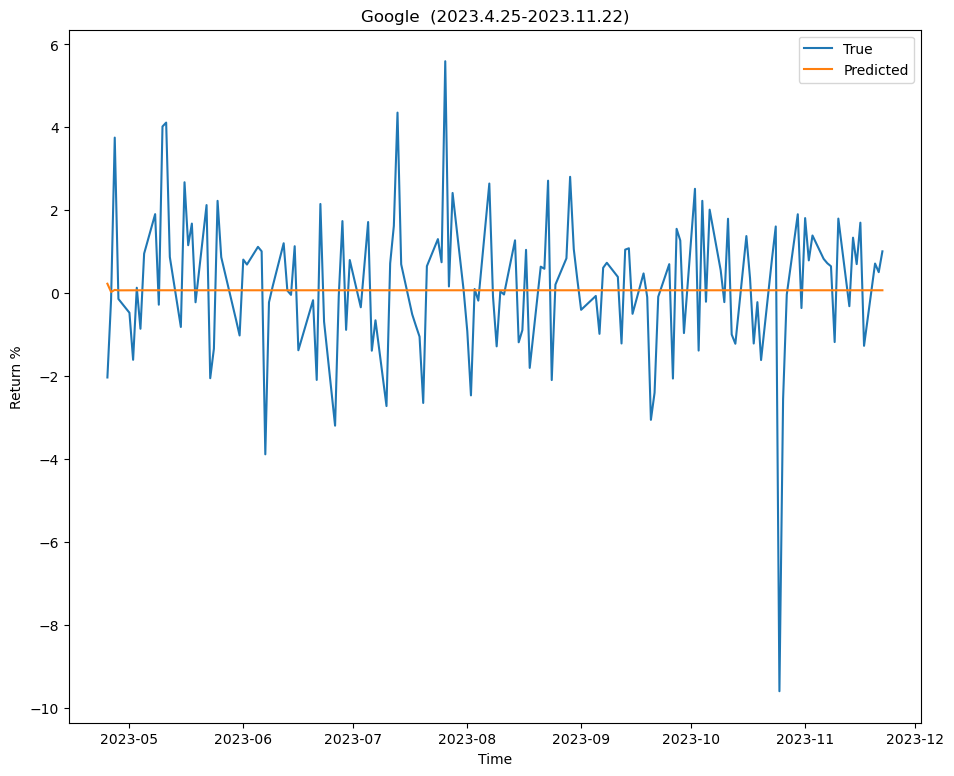

In [47]:
plt.plot(test['Google'], label='True')
plt.plot(forecast['Google'],label='Predicted')
plt.xlabel('Time')
plt.ylabel('Return %')
plt.title('Google  (2023.4.25-2023.11.22)')
plt.legend()
plt.show()

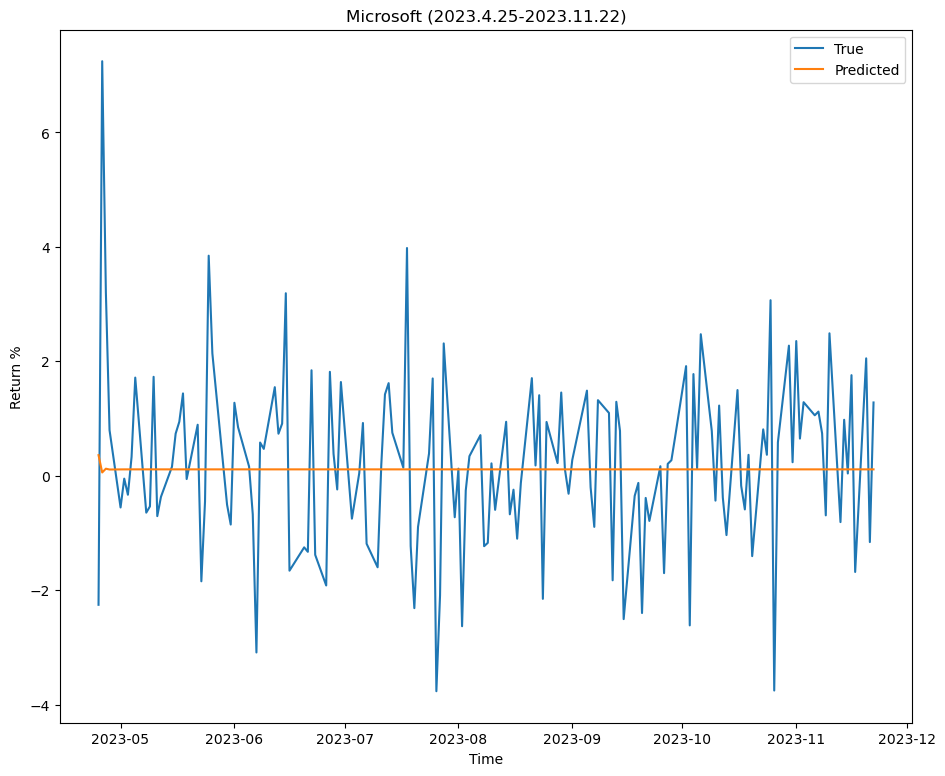

In [48]:
plt.plot(test['Microsoft'], label='True')
plt.plot(forecast['Microsoft'],label='Predicted')
plt.xlabel('Time')
plt.ylabel('Return %')
plt.title('Microsoft (2023.4.25-2023.11.22)')
plt.legend()
plt.show()

### Calculate the accuracy

In [49]:
def forecast_accuracy(forecast, actual):
    
    mse =np.mean((forecast - actual)**2)
    rmse = np.mean((forecast - actual)**2)**.5  

    return({'mse':mse,'rmse':rmse})

In [50]:
print('Forecast Accuracy of: Google')
accuracy_prod = forecast_accuracy(forecast['Google'], test['Google'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))


print('\nForecast Accuracy of: Microsoft')
accuracy_prod = forecast_accuracy(forecast['Microsoft'], test['Microsoft'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))


Forecast Accuracy of: Google
mse :  3.0551
rmse :  1.7479

Forecast Accuracy of: Microsoft
mse :  2.399
rmse :  1.5489


## Rolling Forecast

In [51]:
rolling_predictions = pd.DataFrame()
test_size = 148

for i in range(test_size):
    train = df_all[:-(test_size-i)]  
    
    forecast_input = train.values[-1:]
    
    model = VAR(train)
    model_fitted = model.fit(1)
    pred = model_fitted.forecast(y=forecast_input, steps=1)
    forecast = pd.DataFrame(pred, columns=df_all.columns )
    rolling_predictions = rolling_predictions.append(forecast)

In [52]:
rolling_predictions.index = test.index
rolling_predictions

,Google,Microsoft,Apple,Amazon
Date,,,,
2023-04-25 00:00:00-04:00,0.228824,0.360896,0.196248,0.007035
2023-04-26 00:00:00-04:00,0.189388,0.427807,0.261717,0.087856
2023-04-27 00:00:00-04:00,-0.687129,-1.116657,-0.375002,0.203207
2023-04-28 00:00:00-04:00,-0.190197,-0.399530,-0.164587,-0.127740
2023-05-01 00:00:00-04:00,-0.352369,-0.246339,-0.209815,-0.129120
...,...,...,...,...
2023-11-16 00:00:00-05:00,-0.062032,0.010261,-0.004944,-0.053560
2023-11-17 00:00:00-05:00,-0.172767,-0.240745,-0.123348,-0.065166
2023-11-20 00:00:00-05:00,0.377709,0.531900,0.403230,0.191956


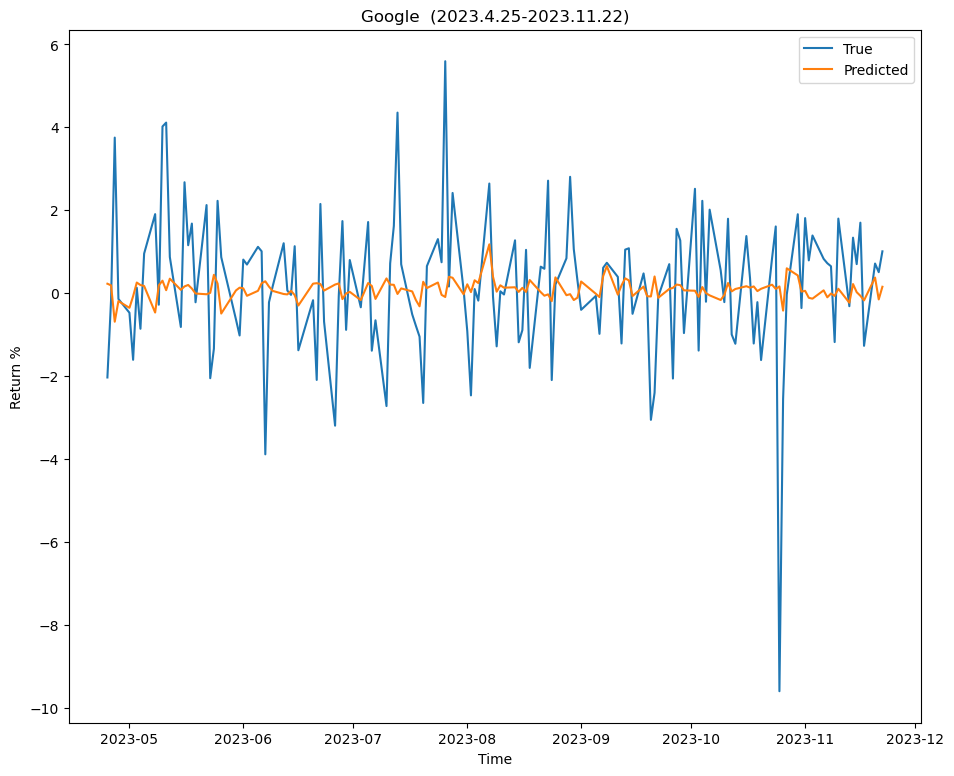

In [53]:
plt.plot(test['Google'], label='True')
plt.plot(rolling_predictions['Google'],label='Predicted')
plt.xlabel('Time')
plt.ylabel('Return %')
plt.title('Google  (2023.4.25-2023.11.22)')
plt.legend()
plt.show()

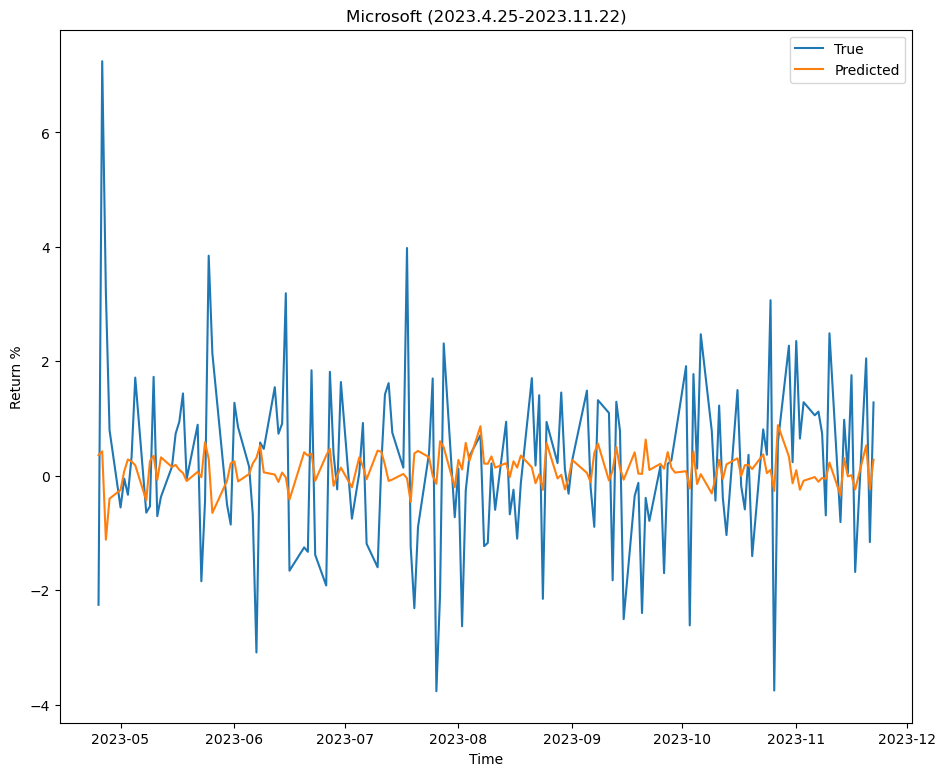

In [54]:
plt.plot(test['Microsoft'], label='True')
plt.plot(rolling_predictions['Microsoft'],label='Predicted')
plt.xlabel('Time')
plt.ylabel('Return %')
plt.title('Microsoft (2023.4.25-2023.11.22)')
plt.legend()
plt.show()

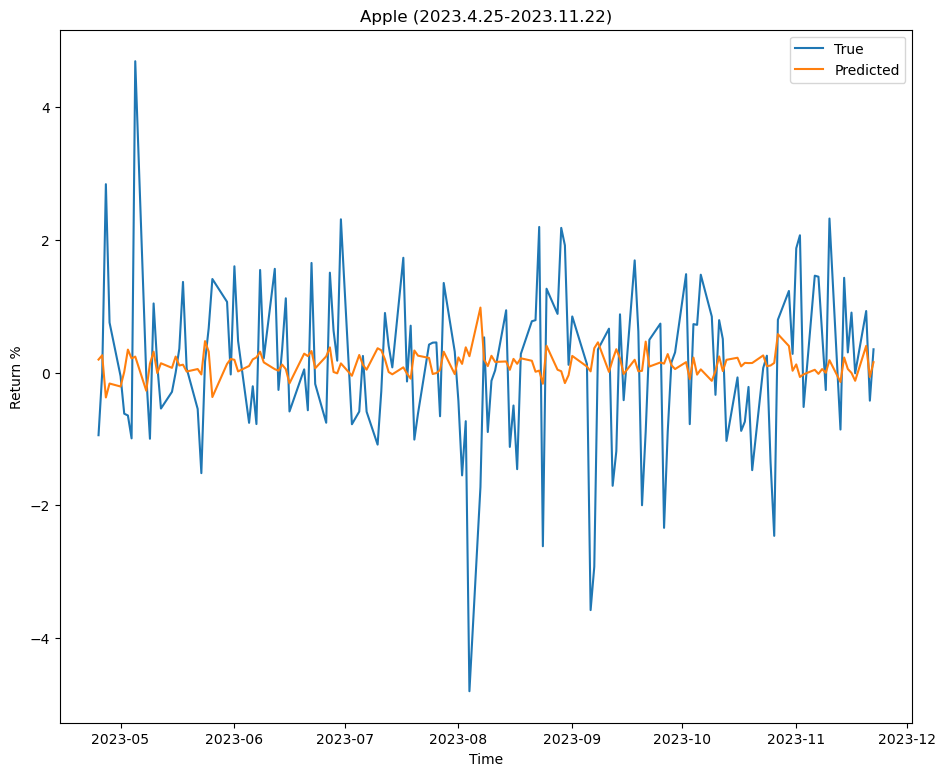

In [56]:
plt.plot(test['Apple'], label='True')
plt.plot(rolling_predictions['Apple'],label='Predicted')
plt.xlabel('Time')
plt.ylabel('Return %')
plt.title('Apple (2023.4.25-2023.11.22)')
plt.legend()
plt.show()

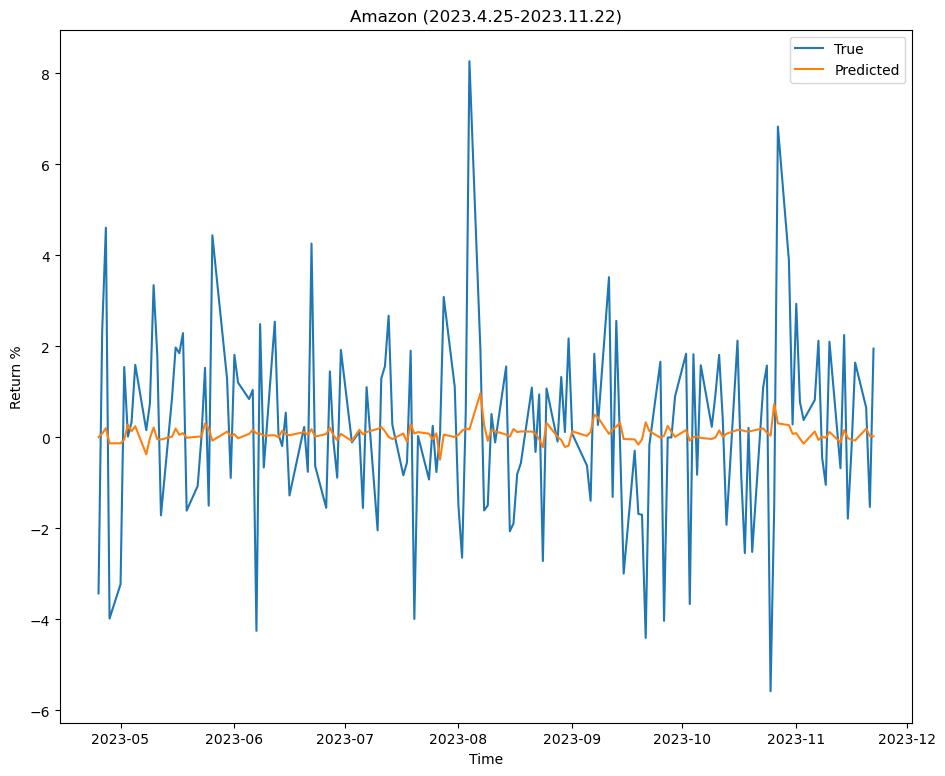

In [57]:
plt.plot(test['Amazon'], label='True')
plt.plot(rolling_predictions['Amazon'],label='Predicted')
plt.xlabel('Time')
plt.ylabel('Return %')
plt.title('Amazon (2023.4.25-2023.11.22)')
plt.legend()
plt.show()

In [55]:
print('Rolling Forecast Accuracy of: Google')
accuracy_prod = forecast_accuracy(rolling_predictions['Google'], test['Google'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))


print('\n Rolling Forecast Accuracy of: Microsoft')
accuracy_prod = forecast_accuracy(rolling_predictions['Microsoft'], test['Microsoft'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))
    

print('\n Rolling Forecast Accuracy of: Apple')
accuracy_prod = forecast_accuracy(rolling_predictions['Apple'], test['Apple'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))
    

print('\n Rolling Forecast Accuracy of: Amazon')
accuracy_prod = forecast_accuracy(rolling_predictions['Amazon'], test['Amazon'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))
    
    

Rolling Forecast Accuracy of: Google
mse :  3.0968
rmse :  1.7598

 Rolling Forecast Accuracy of: Microsoft
mse :  2.3947
rmse :  1.5475

 Rolling Forecast Accuracy of: Apple
mse :  1.5851
rmse :  1.259

 Rolling Forecast Accuracy of: Amazon
mse :  4.1531
rmse :  2.0379
